In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
from sklearn import datasets
itineries = pd.read_csv('UPDATEDitineries-airportCodes3.csv')
# Extracting septal and petal widths and lengths
X = pd.DataFrame(itineries)

In [3]:
for x in range(0,len(X)):
    string = X['travelDuration'][x]
    if (string.find('H') != -1):
        if (string.find('M') != -1):
            num = int(string[string.find('T')+1: string.find('H')])*60 + int(string[string.find('H')+1: -1])
        else:
            num = int(string[string.find('T')+1: string.find('H')])*60
    else:
        if (string.find('M') != -1):
            num = int(string[string.find('T')+1:-1])
        else:
            num = 0
    X['minutes'][x] = num

C:\Users\yummy\AppData\Local\Temp\ipykernel_18104\2252021947.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['minutes'][x] = num


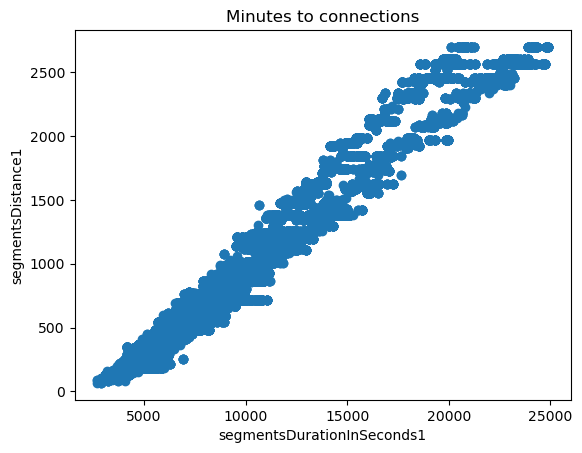

In [36]:
plt.scatter(X['segmentsDurationInSeconds1'],X['segmentsDistance1']) #Colored by species

plt.title('Minutes to connections')
plt.xlabel('segmentsDurationInSeconds1')
plt.ylabel('segmentsDistance1')

plt.show()

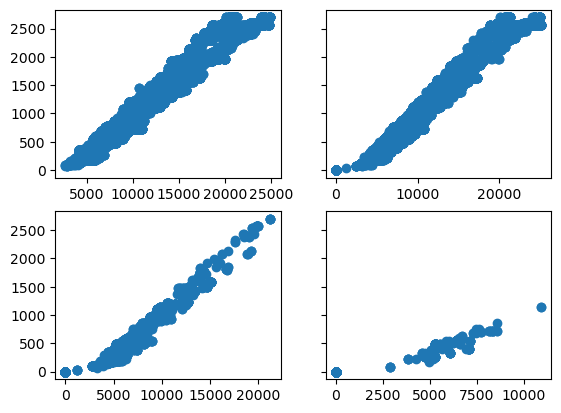

In [137]:
fig, axes = plt.subplots(2, 2, sharey=True)
axes[0, 0].scatter(X['segmentsDurationInSeconds1'], X['segmentsDistance1'])
axes[0, 1].scatter(X['segmentsDurationInSeconds2'], X['segmentsDistance2'])
axes[1, 0].scatter(X['segmentsDurationInSeconds3'], X['segmentsDistance3'])
axes[1, 1].scatter(X['segmentsDurationInSeconds4'], X['segmentsDistance4'])
plt.show()

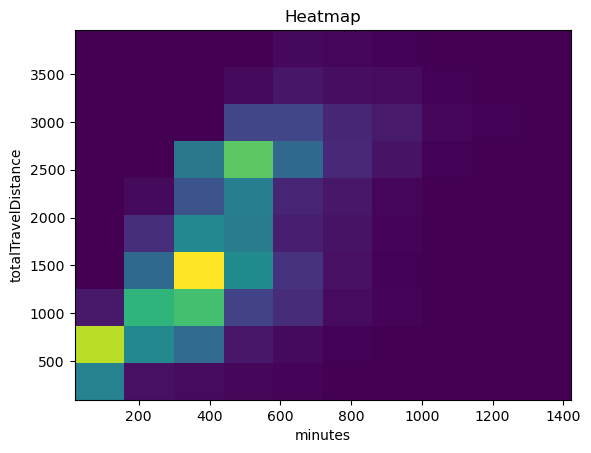

In [98]:
Z, hmx, hmy = np.histogram2d(X['minutes'],X['totalTravelDistance'])

plt.title('Heatmap')
plt.xlabel('minutes')
plt.ylabel('totalTravelDistance')
plt.pcolormesh(hmx,hmy,Z.T)

plt.show()

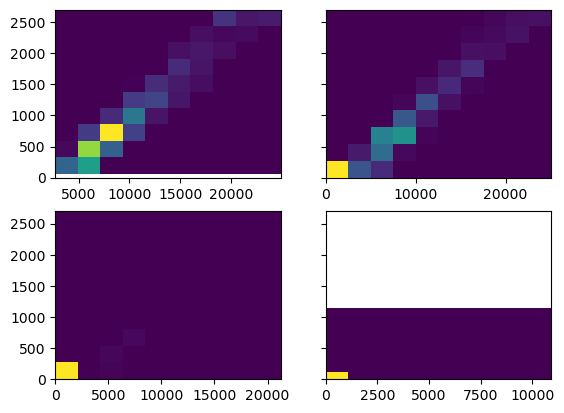

In [101]:
Z1, hmx1, hmy1 = np.histogram2d(X['segmentsDurationInSeconds1'], X['segmentsDistance1'])
Z2, hmx2, hmy2 = np.histogram2d(X['segmentsDurationInSeconds2'], X['segmentsDistance2'])
Z3, hmx3, hmy3 = np.histogram2d(X['segmentsDurationInSeconds3'], X['segmentsDistance3'])
Z4, hmx4, hmy4 = np.histogram2d(X['segmentsDurationInSeconds4'], X['segmentsDistance4'])
fig, axes = plt.subplots(2, 2, sharey=True)
axes[0, 0].pcolormesh(hmx1,hmy1,Z1.T)
axes[0, 1].pcolormesh(hmx2,hmy2,Z2.T)
axes[1, 0].pcolormesh(hmx3,hmy3,Z3.T)
axes[1, 1].pcolormesh(hmx4,hmy4,Z4.T)
plt.show()

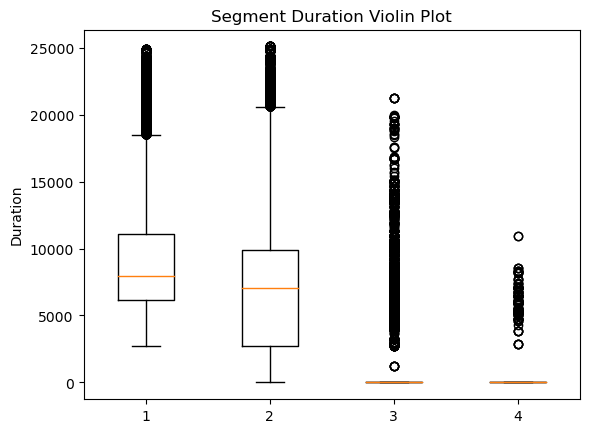

In [99]:
plt.boxplot([X['segmentsDurationInSeconds1'],X['segmentsDurationInSeconds2'],X['segmentsDurationInSeconds3'],X['segmentsDurationInSeconds4']])

plt.title('Segment Duration Violin Plot')
# plt.xticks([1,4],['Segment 1','Segment 2', 'Segment 3', 'Segment 4'])?\
plt.ylabel('Duration')

plt.show()

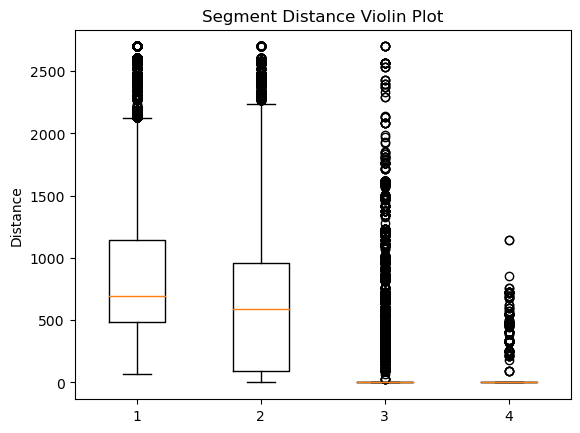

In [65]:
plt.boxplot([X['segmentsDistance1'],X['segmentsDistance2'],X['segmentsDistance3'],X['segmentsDistance4']])

plt.title('Segment Distance Violin Plot')
# plt.xticks([1,4],['Segment 1','Segment 2', 'Segment 3', 'Segment 4'])\
plt.ylabel('Distance')

plt.show()

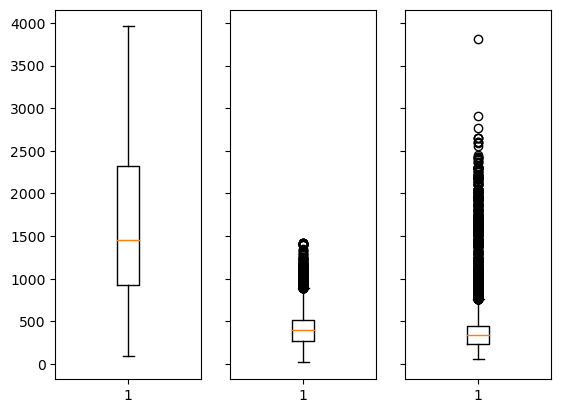

In [69]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.boxplot([X['totalTravelDistance']])
ax2.boxplot([X['minutes']])
ax3.boxplot([X['totalFare']])

plt.show()

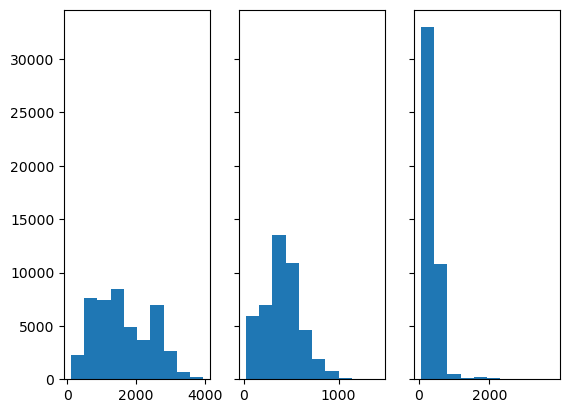

In [70]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.hist([X['totalTravelDistance']], histtype='bar', align='mid')
ax2.hist([X['minutes']], histtype='bar', align='mid')
ax3.hist([X['totalFare']], histtype='bar', align='mid')

plt.show()


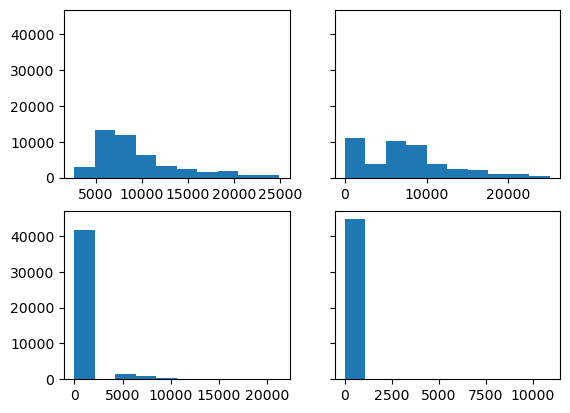

In [72]:
fig, axes = plt.subplots(2, 2, sharey=True)
axes[0, 0].hist(X['segmentsDurationInSeconds1'], histtype='bar', align='mid')
axes[0, 1].hist(X['segmentsDurationInSeconds2'], histtype='bar', align='mid')
axes[1, 0].hist(X['segmentsDurationInSeconds3'], histtype='bar', align='mid')
axes[1, 1].hist(X['segmentsDurationInSeconds4'], histtype='bar', align='mid')
plt.show()

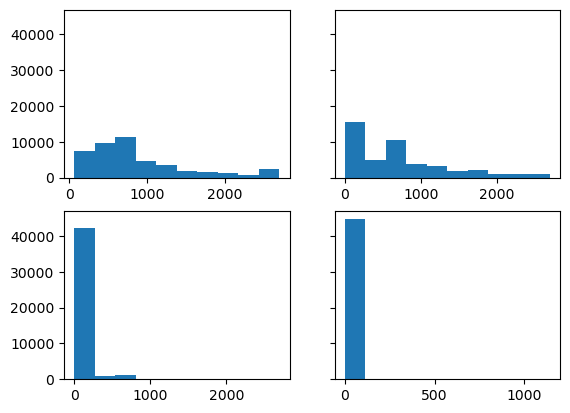

In [73]:
fig, axes = plt.subplots(2, 2, sharey=True)
axes[0, 0].hist(X['segmentsDistance1'], histtype='bar', align='mid')
axes[0, 1].hist(X['segmentsDistance2'], histtype='bar', align='mid')
axes[1, 0].hist(X['segmentsDistance3'], histtype='bar', align='mid')
axes[1, 1].hist(X['segmentsDistance4'], histtype='bar', align='mid')
plt.show()

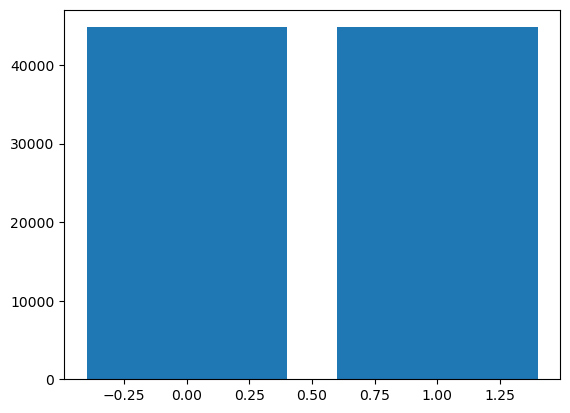

In [84]:
airports = []
numFlights = []
for x in range(0, len(X)):
    if not X['startingAirport'][x] in airports:
        airports.append(X['startingAirport'][x])
        numFlights.append(1)
    else:
        numFlights[airports.index(X['startingAirport'][x])] += 1

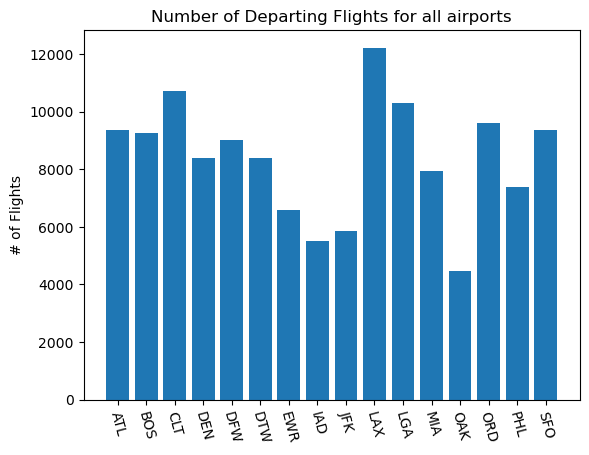

In [133]:
plt.bar(range(0, len(airports)),numFlights,align='center')
plt.title('Number of Departing Flights for all airports')
plt.xticks(range(0,len(airports)), airports, rotation = -75)
plt.ylabel('# of Flights')
plt.show()

In [95]:
airports1 = []
numFlights1 = []
for x in range(0, len(X)):
    if not X['destinationAirport'][x] in airports1:
        airports1.append(X['destinationAirport'][x])
        numFlights1.append(1)
    else:
        numFlights1[airports1.index(X['destinationAirport'][x])] += 1

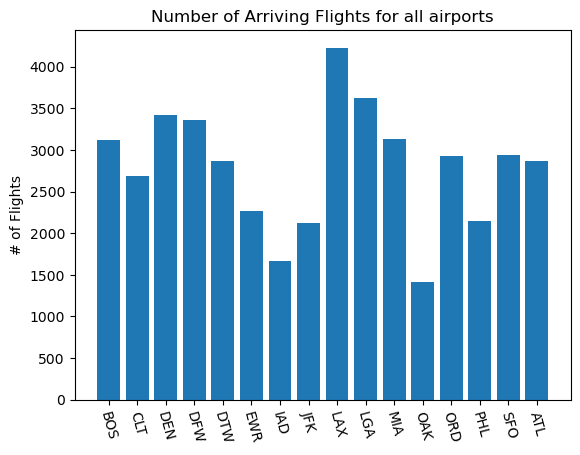

In [134]:
plt.bar(range(0, len(airports1)),numFlights1,align='center')
plt.title('Number of Arriving Flights for all airports')
plt.xticks(range(0,len(airports1)), airports1, rotation = -75)
plt.ylabel('# of Flights')
plt.show()